In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy as np
import matplotlib.pyplot as plt
import pickle
import json

import sys
sys.path.append("../../")

from src.dataset_manager import DatasetConvertor 

========= Data Unit Summary =========
  Name:                combined_flows_forward
  Length Window:        20
  Sampling Interval Ts: 0.01
  Data Length:          104067
  Context Dimension:    12
  Compression Rate:     0.2328


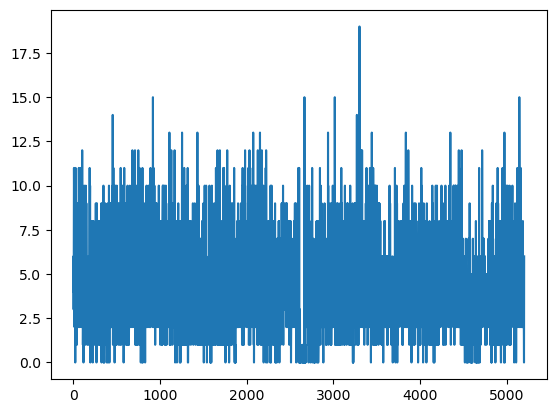

In [2]:
rawDatasetFolder = "../../data/raw"
dpdrDatasetFolder = "../../data/processed/dpdr"
configPaths = [
    "../config/combined_flows_forward.json", 
    "../config/combined_flows_backward.json"
]

datasetConverter = DatasetConvertor(rawDatasetFolder)
for configPath in configPaths:
    with open(configPath, "r") as f:
        config = json.load(f)
    datasetConverter.addDataUnit(config)
    name = config.get("NAME")
    dataUnit = datasetConverter.getDataUnit(name)
    dataUnit.saveDataUnit(f"{dpdrDatasetFolder}/{name}.csv")

dataUnit = datasetConverter.getDataUnit("combined_flows_forward")
dataUnit.display()
trffic = dataUnit.generateTrafficPattern()
plt.plot(trffic.flatten())
plt.show()